Импорт библдиотеки и считывание 'csv' файла 

In [53]:
import pandas as pd

In [54]:
dfc = pd.read_csv('credit_data.csv')
dfc.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2


Размер таблицы данных

In [55]:
dfc.shape

(150000, 8)

Список заголовков столбцов

In [56]:
list(dfc)
dfc.columns

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'age_group'],
      dtype='object')

In [60]:
dfc.rename(columns={'MonthlyIncome':'M_Income','NumberOfOpenCreditLinesAndLoans':'OpenCrLines',
                    'NumberRealEstateLoansOrLines': 'RealEstateLoans', 'NumberOfDependents':'Dependents'}, inplace=True)

In [57]:
dfc.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2


Сумма и доля  пропусков в каждом столбце

In [48]:
dfc.isnull().sum()

defaulted              0
age                    0
DebtRatio              0
M_Income           29731
OpenCrLines            0
RealEstateLoans        0
Dependents          3924
age_group              0
dtype: int64

In [49]:
dfc.isnull().mean()

defaulted          0.000000
age                0.000000
DebtRatio          0.000000
M_Income           0.198207
OpenCrLines        0.000000
RealEstateLoans    0.000000
Dependents         0.026160
age_group          0.000000
dtype: float64

Доля заемщиков кторые не выплатили кредит 'defaulted'

In [5]:
dfc['defaulted'].mean()

0.06684

In [58]:
dfc['defaulted'].value_counts()

0    139974
1     10026
Name: defaulted, dtype: int64

Средний доход выше среднего M_Income, кол-во по доходам, сумма всего

In [61]:
dfc_avg = dfc['M_Income'].mean() # среднее занчение len(df[df['team']=='A'])
dfc[dfc['M_Income'] > dfc_avg].value_counts('M_Income')

M_Income
10000.0      1466
7000.0       1223
8000.0       1127
7500.0       1051
10500.0      1013
             ... 
13102.0         1
13108.0         1
13113.0         1
13115.0         1
3008750.0       1
Length: 7654, dtype: int64

In [102]:
len(dfc[dfc['M_Income'] > dfc_avg])

44146

Вычислите медианный возраст заемщиков, которые не вернули кредит (defaulted=1). 
Он больше или меньше медианного возраста всех заемщиков?

In [32]:
dfc.groupby('defaulted')['age'].median()

defaulted
0    52.0
1    45.0
Name: age, dtype: float64

In [33]:
age1 = dfc[(dfc['defaulted']==1)].median()['age']
print(age1)

45.0


In [21]:
age2 =dfc['age'].median()
print(age2)

52.0


In [35]:
print('разность возраста не вернувших кредит и всех заемщиков:', age1 - age2)

разность возраста не вернувших кредит и всех заемщиков: -7.0


Сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке?

In [74]:
avg = dfc['M_Income'].mean()

dfc[(dfc['age']> 40) & (dfc['M_Income'] > avg)]

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,Dependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
4,0,49,0.024926,63588.0,7,1,0.0,2
9,0,57,0.606291,23684.0,9,4,2.0,3
12,0,46,0.298354,12454.0,13,2,2.0,2
15,0,64,0.209892,11362.0,7,1,2.0,3
...,...,...,...,...,...,...,...,...
149979,1,55,0.057235,8700.0,7,0,0.0,3
149981,0,43,0.121752,6849.0,4,0,4.0,2
149989,0,62,0.001408,9233.0,4,0,3.0,3
149991,0,59,0.477658,10316.0,10,2,0.0,3


Вычисление новых признаков и группировка данных

Разбить заемщиков на 3 возрастные группы:

In [96]:
splits = dfc.groupby('age_group')
splits.count()

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,Dependents
age_group,,,,,,,
1,10758,10758,10758,9053,10758,10758,10328
2,59376,59376,59376,50600,59376,59376,58690
3,79866,79866,79866,60616,79866,79866,77058


Количество заемщиков в каждой возрастной группе 
Визуализация данные в виде гистограммы

In [98]:
import matplotlib.pyplot as plt

In [99]:
%matplotlib inline

In [107]:
age_g = dfc['age_group'].value_counts()
print(age_g)

3    79866
2    59376
1    10758
Name: age_group, dtype: int64


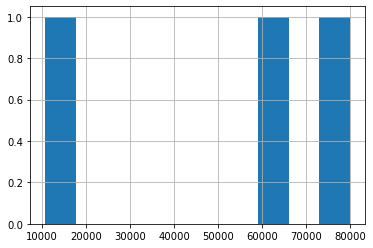

In [121]:
plt.grid()
plt.hist(age_g);

In [143]:
dfc.groupby('defaulted')['age_group'].value_counts()

defaulted  age_group
0          3            76367
           2            54093
           1             9514
1          2             5283
           3             3499
           1             1244
Name: age_group, dtype: int64

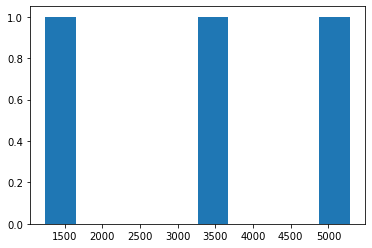

In [145]:
def_1 = dfc[dfc['defaulted']==1]['age_group'].value_counts()
plt.hist(def_1);